# Walk-through of Dice example in _Think Bayes_

In this notebook, I implement the Dice example, or will I roll a 6 if my dice is fair or biased? This example comes from the book _Think Bayes_ by Allen Downey. 

Generally speaking, _Think Bayes_ is an overview of bayesian thinking, learning the concepts through practical programming in python.

In addition to implementing his approach as written, I deconstruct the example to make his calculations more transparent.

To run this mnotebook you need a python2 kernel, since the example is originally written in python2. However, my code could be ran in python3. 

First I have a helper function to import his modules and I import my own modules,

In [9]:
#https://stackoverflow.com/questions/67631/how-to-import-a-module-given-the-full-path
def import_file(full_path_to_module):
    try:
        import os
        module_dir, module_file = os.path.split(full_path_to_module)
        module_name, module_ext = os.path.splitext(module_file)
        save_cwd = os.getcwd()
        os.chdir(module_dir)
        module_obj = __import__(module_name)
        module_obj.__file__ = full_path_to_module
        globals()[module_name] = module_obj
        os.chdir(save_cwd)
    except:
        raise ImportError

#change path accordingly
path = '/Users/npg2108/GitHub/'
import_file(path+'thinkbayes/ThinkBayes-master/code/thinkbayes.py')

#load modules/files
import thinkbayes
import numpy as np
np.set_printoptions(precision=3)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')
import_file(path+'thinkbayes/ThinkBayes-master/code/dice.py')

## Dice Example

In the book, the Dice example is presented.

This example presents what is the probability (the likely chance) of rolling a 6, given certain views of how the word works or _hypotheses_. These hypotheses are having rolled a 4-, 6-, 8-, 12-, or 20-sided die. The example shows the posterior probability after one roll and after more rolls (with, say, rolling an additional 8). 

> The **posterior** probability is an _updated_ measure of probability of a hypothesis after having seen some data that clarifies or kind of helps you discern how likely that hypothesis, in our case rolling an N-sided die, could be true.

The main output, from the book's code, for the Dice example is

In [2]:
import_file(path+'thinkbayes/ThinkBayes-master/code/dice.py')
dice.main()

After one 6
4 0.0
6 0.392156862745
8 0.294117647059
12 0.196078431373
20 0.117647058824
After more rolls
4 0.0
6 0.0
8 0.915845271969
12 0.080403425797
20 0.00375130223399


This example from the book shows computing the posterior probability of the type of N-sided die given the rolls (data) seen. 

<hr>

The example above is one of the first examples in the book, and is a good introduction to what the posterior probability, or just posterior for short, is. However, how he computes the posterior is not transparent unless you dig into his scripts. I'll break this down step by step.

## Computing the Posterior Step-by-Step
First, we have some hypotheses about our world, which is that there are 5 different N-sided die that we could roll. There's no preference for which one we roll, so each is equally likely to be rolled. Below I print a dictionary showing the **prior** probability of rolling each die, since we have no _prior_ knowledge of die preference.

In [3]:
hypos = [4, 6, 8, 12, 20]
prior = 1.0 / len(hypos)
dictionary = dict()
for hypo in hypos:
    dictionary[hypo] = prior
print(dictionary)

{8: 0.2, 12: 0.2, 4: 0.2, 6: 0.2, 20: 0.2}


Interpreting the above, the probability of rolling an 8-sided dice is 0.2 or 1/5, for example. 

In our world, we roll a dice and get a 6. That's our data.

In [4]:
data = 6

If we roll a 6, it wouldn't make sense that we rolled a 4-sided die and got a 6. Obviously, given the die roll (our data), the probability of our hypotheses change. This is the **likelihood** of the data given the hypotheses. 

In [5]:
# function for computing likeligood of data given an hypothesis
def Likelihood(data,hypo):
        """Computes the likelihood of the data under the hypothesis.
        hypo: integer number of sides on the die
        data: integer die roll
        """
        if hypo < data:
            return 0
        else:
            return 1.0/hypo

tmp = {}
likes = []
# looping through hypotheses to see change in probability of hypothesis without data (prior probability) and with data (likelihood)
for hypo in np.sort(dictionary.keys()):
    like = Likelihood(data, hypo)
    likes.append(like)
    print("If I rolled a "+repr(hypo)+"-sided dice, how does my prior probability change if I roll a "+repr(data)+"?")
    if hypo<data:
        print('Likelihood of rolling a 6 from a '+repr(hypo)+'-sided dice: not likely since 6 is greater than the numbers on the dice')
    else:
        print('Likelihood of rolling a 6 from a '+repr(hypo)+'-sided dice: '+repr(1)+'/'+repr(hypo)+' or '+repr(round(like,3)))
    print('Prior probability of the hypothesis before seeing data: '+repr(round(dictionary.get(hypo, 0),3)))
    print('Posterior probability of the hypothesis after seeing data: '+repr(round(dictionary.get(hypo, 0) * like,3))+'\n')
    tmp[hypo] = dictionary.get(hypo) * like

If I rolled a 4-sided dice, how does my prior probability change if I roll a 6?
Likelihood of rolling a 6 from a 4-sided dice: not likely since 6 is greater than the numbers on the dice
Prior probability of the hypothesis before seeing data: 0.2
Posterior probability of the hypothesis after seeing data: 0.0

If I rolled a 6-sided dice, how does my prior probability change if I roll a 6?
Likelihood of rolling a 6 from a 6-sided dice: 1/6 or 0.167
Prior probability of the hypothesis before seeing data: 0.2
Posterior probability of the hypothesis after seeing data: 0.033

If I rolled a 8-sided dice, how does my prior probability change if I roll a 6?
Likelihood of rolling a 6 from a 8-sided dice: 1/8 or 0.125
Prior probability of the hypothesis before seeing data: 0.2
Posterior probability of the hypothesis after seeing data: 0.025

If I rolled a 12-sided dice, how does my prior probability change if I roll a 6?
Likelihood of rolling a 6 from a 12-sided dice: 1/12 or 0.083
Prior probabili

Let's see if this makes sense. Now the likelihood of the data, rolling a 6, is 0 if we rolled a 4-sided die. This makes sense-can't get a 6 without a 6 on the dice! But for every die with increasing sides, the likelihood gets smaller. This makes sense because there's more options to roll than just a 6. But why are the probabilities after seeing the data collectively, when summed together, higher than before seeing the data? 

One of the 3 axioms of probability is that the sum of probabilities has to equal one. Right now they don't sum to 1 and so we can't compare the likelihoods. We use the **normalizing constant** to make these probabilities again.

In [6]:
print('Sum of posterior probabilities '+repr(sum(tmp.values()))+'\n')
print('Now dividing this sum for each posterior probability\n')
tmp2 = []
# normalizing likelihoods by their vsum to get posterior probability
for t in tmp.itervalues():
    tmp2.append(t / sum(tmp.values()))
series = pd.Series(tmp2,index=tmp.keys()).sort_index()
print(series)

Sum of posterior probabilities 0.08500000000000002

Now dividing this sum for each posterior probability

4     0.000000
6     0.392157
8     0.294118
12    0.196078
20    0.117647
dtype: float64


The above is exactly what Allen Downey computes in the book! Yay! 

Let me put this in a nice display so the process makes sense.

In [7]:
#instantiate dataframe
df = pd.DataFrame()
#make cols

#hypotheses
df['Hypothesis'] = [x for x in np.sort(dictionary.keys())]
df.index = df['Hypothesis']
#prior probability for hypotheses
df['Prior'] = [dictionary[x] for x in np.sort(dictionary.keys())]
#data
df['Data'] = np.repeat(6,df.shape[0])
#likelihood-probability of data given an hypothesis
df['Likelihood'] = likes
#normalizing likelihoods to get posterior
df['Posterior'] = df['Likelihood'] * df['Prior'] / sum(tmp.values())
#sorting by hypotheses
df.sort_values(by=['Hypothesis'],inplace=True)
df

,Hypothesis,Prior,Data,Likelihood,Posterior
Hypothesis,,,,,
4,4,0.2,6,0.000000,0.000000
6,6,0.2,6,0.166667,0.392157
8,8,0.2,6,0.125000,0.294118
12,12,0.2,6,0.083333,0.196078
20,20,0.2,6,0.050000,0.117647


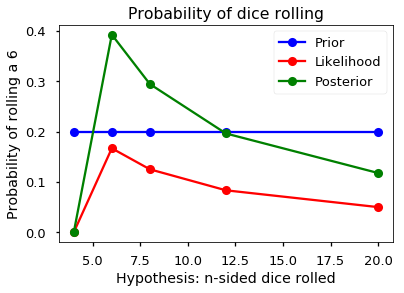

In [10]:
# plotting each probability measure
plt.plot(df['Hypothesis'].tolist(),df['Prior'],color='blue',marker='o')
plt.plot(df['Hypothesis'].tolist(),df['Likelihood'],color='red',marker='o')
plt.plot(df['Hypothesis'].tolist(),df['Posterior'],color='green',marker='o')
plt.ylabel('Probability of rolling a '+repr(data))
plt.xlabel('Hypothesis: n-sided dice rolled')
plt.title('Probability of dice rolling')
plt.legend()
plt.show()

We see that knowing that we rolled a 6 changed our chances of rolling a N-sided dice. Our original or **prior** chances, shown in blue, is the same for each N-sided die. However, the **likelihood** of rolling a 6 given each die, shown in red, changed our chances to our **posterior** distribution, shown in green. 

This completes the first portion of the dice example.

<hr>

The second part of the dice example shows how the probability changes after we have seen more data

In [11]:
more_data = [4, 8, 7, 7, 2]

How do our chances of rolling any given N-sided die change with seeing this new data?

To clean up the code a bit, I'll make a function for normalizing the probabilities.

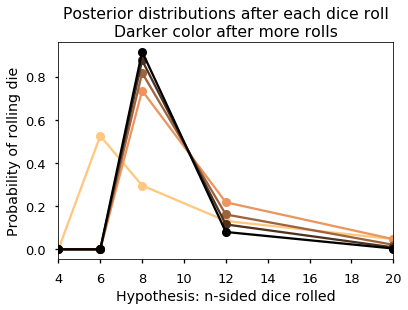

In [12]:
#Compute Likelihood for each successive data we see, and for each hypothesis
#we update the previously computed posterior for each data we see. 
tmp = {}
likes = []
updated_dict = df['Posterior'].to_dict()
updated_posteriors = pd.DataFrame()
for data in more_data:
    for hypo in dictionary.keys():
        like = Likelihood(data, hypo)
        likes.append(like)
        tmp[hypo] = updated_dict.get(hypo) * like
    tmp2 = dict()
    for t in tmp.keys():
        tmp2[t] = (tmp.get(t) / sum(tmp.values()))
    series = pd.Series(tmp2)
    series.name = data
    updated_posteriors = updated_posteriors.append(series)
    updated_dict = tmp2
#graphical display of updated posterior distributions after seeing each successive data
updated_posteriors.T.plot(colormap='copper_r',marker='o')
plt.title('Posterior distributions after each dice roll\nDarker color after more rolls')
plt.ylabel('Probability of rolling die')
plt.xlabel('Hypothesis: n-sided dice rolled')
plt.legend().set_visible(False)
plt.show()

The above graph illustrations how our probability estimate changes with more evidence. 

The lightwst line is the posterior distribution after seeing a six. Each successive line (darker colors) are the new posterior distributions after observing more die rolls (after rolling 4, 8, 7, 7, 2)

We observe more dice rolls, and thus our belief of the type of dice rolled also changes. In this case, our data supports that we most likely rolled an 8-sided die. 

Since we rolled 7s and an 8, it makes sense that it is not likely at all that we rolled a 4-sided or 6-sided dice since there's no possibility of rolling higher numbers even though we observe so.

Since we didn't roll any higher than 8, it makes sense the chance we rolled a 12- or 20-sided die decreases while the probability of rolling an 8-sided die increases (we rolled numbers equal to or less than 8). 

And just to confirm that the same probabilities were estimated as in the exercise,

In [13]:
updated_posteriors.loc[2,:]

4     0.000000
6     0.000000
8     0.915845
12    0.080403
20    0.003751
Name: 2, dtype: float64

After rolling a 2, including the other numbers rolled, we are left with the following **posterior** probabilities for our hypotheses (N-sided die roll). The same probabilities as the exercise.

<br>

## The End

So there we have it. We computed the posteriors from scratch. We can see how we had to compute:

* The **prior**, which is just the probability of any given hypothesis to be true _without_ any data. 

* The **likelihood**, which is just the probability of the data given an individual hypothesis is true. 

* The prior times the likelihood, with dividing by a **normaling constant** to ensure we get actual probabilities (sum up to 1) from our multiplication. These probabilities are our **posterior probabilities**.

This doesn't seem too bad. The intuition is we have an idea about the world, and we update the chances that our world follows that idea given data we observe. 

I hope this notebook provides some transparency in how posterior probabilities are computed. 
